<a href="https://colab.research.google.com/github/junsookim76/Ewha_2023/blob/main/5_Random_Walk_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random walks on 2023_05_03 and 2023_05_10 

In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# <font color=crimson>Table of Contents</font>

* __(5/3) 1-Dim Random Walks__
>
>1. How to use 'random.rand'
>2. Perform the random walks
>3. Plotting the trajectory as a function of steps
>4. Repeating the same calculation for many different sets
>5. Plotting the MSD as a function of steps
>6. Calculating the diffusion coefficient by fitting the MSD to a linear line
>7. Plotting the probability distribution at nth random walk
>
* __(5/10) 3-Dim Random Walks__
>
>1. Perform the 3D random walks
>2. Plotting the 1D trajectory in each direction
>3. Plotting the 3D trajectory 
>4. Plotting the MSD as a function of steps
>5. Calculating the diffusion coefficient by fitting the MSD to a linear line
>
* __(5/10) Comparison between 1-Dim and 3-Dim Random Walks__


# (5/3) <font color=crimson>1-Dim Random Walks</font>

## 1. How to use 'random.rand'

>from numpy import random
> 
> random.rand(nsteps) 
>>nsteps개의 random number 생성
>>
>>Uniform distribution with \[0,1)
>
> np.round: 반올림
>
> delx = 2 * [ ((randnum)의 반올림) - 0.5 ]
>>-1 또는 1의 값을 생성

(700,)
[ 1.  1.  1.  1. -1.  1.  1.  1.  1.  1.]


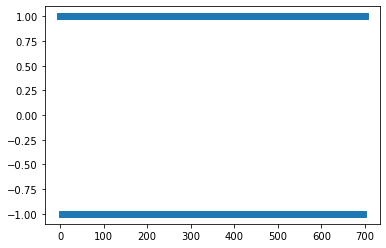

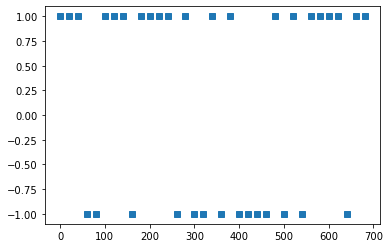

In [ ]:
nsteps = 700

randnum = random.rand(nsteps)

delx = 2*(np.round(randnum)-0.5)

print(delx.shape)

print(delx[:10])

istep = np.arange(len(delx))

plt.plot(istep,delx,marker='s',linestyle="None")

plt.show()

plt.plot(istep[np.mod(istep,20)==0],delx[np.mod(istep,20)==0],marker='s',linestyle="None")

plt.show()



## 2. Perform the random walk

>np.cumsum: 누적 합을 계산
> 

In [ ]:
nsteps = 700

randnum = random.rand(nsteps)

delx = 2*(np.round(randnum)-0.5)

x = np.cumsum(delx)
    
xsq = x**2

print("After %d steps, " %(nsteps))
print("\tx(%d) = %d" %(nsteps,x[nsteps-1]))
print("\tx^2(%d) = %d" %(nsteps,xsq[nsteps-1]))

After 700 steps, 
	x(700) = 44
	x^2(700) = 1936


## 3. Plotting the trajectory as a function of steps

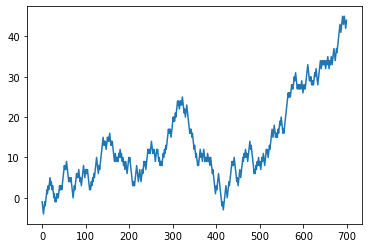

In [ ]:
istep = np.arange(len(xsq))

plt.plot(istep,x)

## 4. Repeating the same calculation for many different sets

>nset: number of different sets
>

In [ ]:
nset = 10000
nsteps = 700

randnum = random.rand(nset,nsteps)

delx = 2*(np.round(randnum)-0.5)

x = np.cumsum(delx,axis=1)
    
xsq = x**2



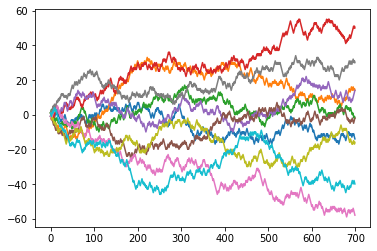

In [ ]:
istep = np.arange(len(xsq[0]))

for i in np.arange(10):
    plt.plot(istep,x[i])

plt.show()

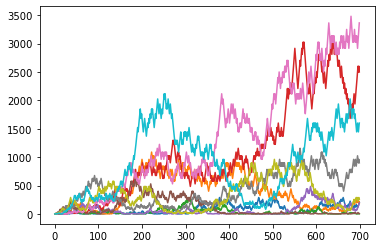

In [ ]:
istep = np.arange(len(xsq[0]))

for i in np.arange(10):
    plt.plot(istep,xsq[i])

plt.show()

## 5. Plotting the MSD as a function of steps

In [ ]:
msd100 = np.mean(xsq[:100],axis=0)

msd = np.mean(xsq,axis=0)

print(msd.shape)

(700,)


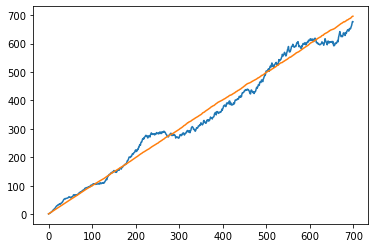

In [ ]:
istep = np.arange(len(msd))

plt.plot(istep,msd100)
plt.plot(istep,msd)

## 6. Calculating the diffusion coefficient by fitting the MSD to a linear line

In [ ]:
def func(x, a):
    return a * x

Fit: y = 0.973 * x 
Diff coef D = 0.486


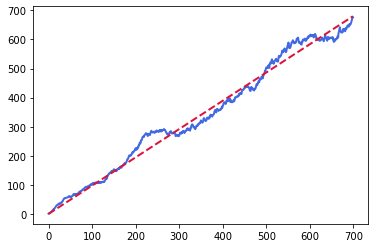

In [ ]:
istep = np.arange(len(msd100))

popt, pcov = curve_fit(func,istep,msd100)

print ("Fit: y = %.3f * x " %(popt[0]))

print ("Diff coef D = %.3f" %(popt[0]/2))

plt.plot(istep, msd100, linewidth=2, color="royalblue", label="Random Walk")

plt.plot(istep, func(istep,*popt), linewidth=2, color="crimson", linestyle="dashed", label="curve fit")

plt.show()



Fit: y = 0.998 * x 
Diff coef D = 0.499


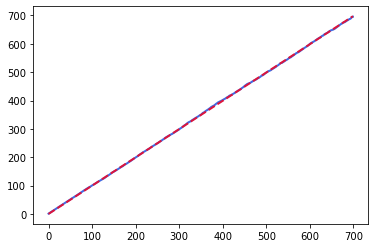

In [ ]:
istep = np.arange(len(msd))

popt, pcov = curve_fit(func,istep,msd)

print ("Fit: y = %.3f * x " %(popt[0]))

print ("Diff coef D = %.3f" %(popt[0]/2))

plt.plot(istep, msd, linewidth=2, color="royalblue", label="Random Walk")

plt.plot(istep, func(istep,*popt), linewidth=2, color="crimson", linestyle="dashed", label="curve fit")

plt.show()

slope1 = popt[0]
dcoef1 = popt[0]/2

## 7. Plotting the probability distribution at nth random walk

>x: random walk (nsets, nstep)
> 

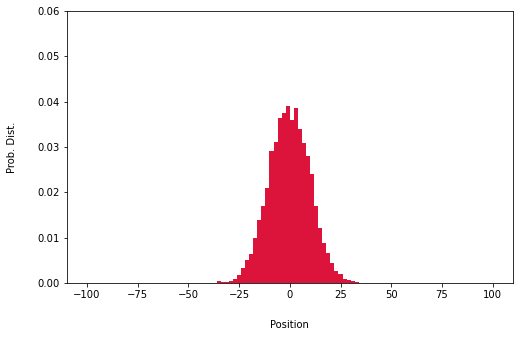

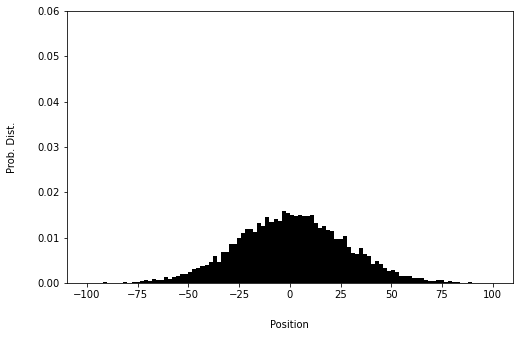

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

plt.hist(x[:,100],bins=100, range=(-100,100), density=True, color="crimson", histtype='stepfilled')

plt.xlabel('Position', labelpad=20)
plt.ylabel('Prob. Dist.', labelpad=20)

plt.ylim(0, 0.06)
plt.yticks(np.arange(0, 0.061, 0.01))

fig, ax = plt.subplots(figsize=(8,5))

plt.hist(x[:,699],bins=100, range=(-100,100), density=True, color="black", histtype='stepfilled')

plt.xlabel('Position', labelpad=20)
plt.ylabel('Prob. Dist.', labelpad=20)

plt.ylim(0, 0.06)
plt.yticks(np.arange(0, 0.061, 0.01))

plt.show()


# (5/10) <font color=crimson>3-Dim Random Walks</font>

## 1. Perform the 3D random walks

In [ ]:
nset = 10000
nsteps = 700

randnum = random.rand(nset,3*nsteps)

delxyz = 2*(np.round(randnum)-0.5) 

delx = delxyz[:,0::3]
dely = delxyz[:,1::3]
delz = delxyz[:,2::3]

x = np.cumsum(delx,axis=1)
y = np.cumsum(dely,axis=1)
z = np.cumsum(delz,axis=1)
    
xsq = x**2
ysq = y**2
zsq = z**2

print(randnum.shape,x.shape,y.shape,z.shape)


(10000, 2100) (10000, 700) (10000, 700) (10000, 700)


## 2. Plotting the 1D trajectory in each direction

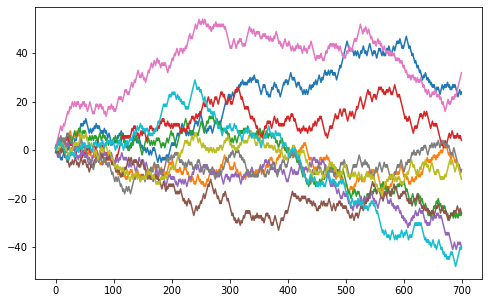

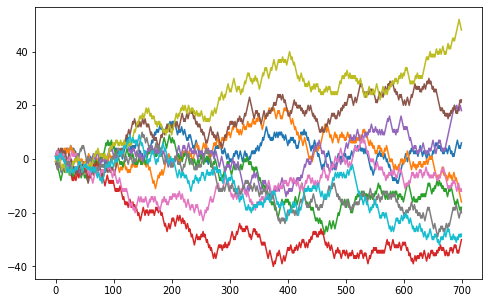

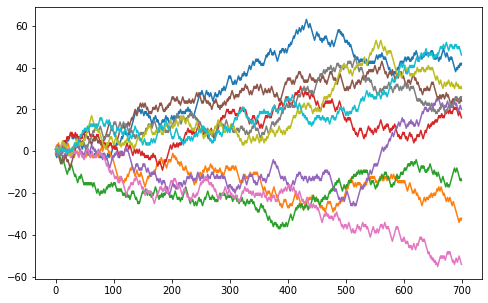

In [ ]:
istep = np.arange(len(xsq[0]))

fig, ax = plt.subplots(figsize=(8,5))

for i in np.arange(10):
    plt.plot(istep,x[i])

fig, ax = plt.subplots(figsize=(8,5))

for i in np.arange(10):
    plt.plot(istep,y[i])

fig, ax = plt.subplots(figsize=(8,5))

for i in np.arange(10):
    plt.plot(istep,z[i])

plt.show()




## 3. Plotting the 3D trajectory 

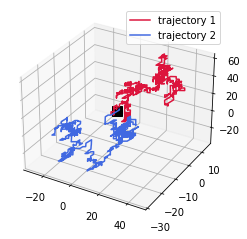

In [ ]:

ax = plt.figure().add_subplot(projection='3d')

ax.plot(0,0,0, color='black',markersize=10,marker='s')

ax.plot(x[0],y[0],z[0], 'crimson', label = 'trajectory 1')
ax.plot(x[2],y[2],z[2], 'royalblue', label = 'trajectory 2')
ax.legend()
plt.show()
    

## 4. Plotting the MSD as a function of steps

In [ ]:
msd100 = np.mean(xsq[:100]+ysq[:100]+zsq[:100],axis=0)

msd = np.mean(xsq+ysq+zsq,axis=0)

print(msd.shape)

(700,)


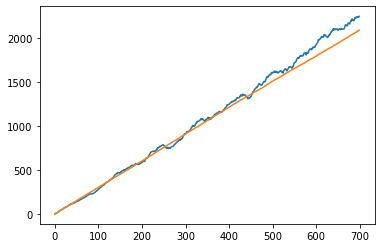

In [ ]:
istep = np.arange(len(msd))

plt.plot(istep,msd100)
plt.plot(istep,msd)

## 5. Calculating the diffusion coefficient by fitting the MSD to a linear line

In [ ]:
def func(x, a):
    return a * x

Fit: y = 3.162 * x 
Diff coef D = 0.527


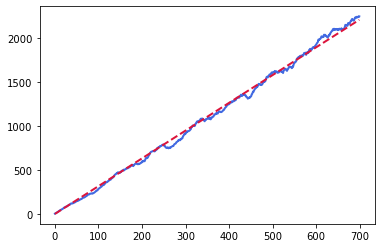

In [ ]:
istep = np.arange(len(msd100))

popt, pcov = curve_fit(func,istep,msd100)

print ("Fit: y = %.3f * x " %(popt[0]))

print ("Diff coef D = %.3f" %(popt[0]/6))

plt.plot(istep, msd100, linewidth=2, color="royalblue", label="Random Walk")

plt.plot(istep, func(istep,*popt), linewidth=2, color="crimson", linestyle="dashed", label="curve fit")

plt.show()



Fit: y = 3.013 * x 
Diff coef D = 0.502


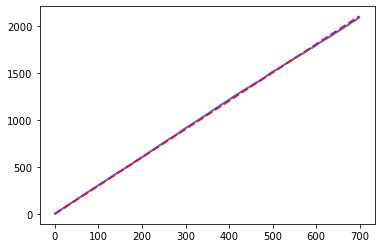

In [ ]:
istep = np.arange(len(msd))

popt, pcov = curve_fit(func,istep,msd)

print ("Fit: y = %.3f * x " %(popt[0]))

print ("Diff coef D = %.3f" %(popt[0]/6))

plt.plot(istep, msd, linewidth=2, color="royalblue", label="Random Walk")

plt.plot(istep, func(istep,*popt), linewidth=2, color="crimson", linestyle="dashed", label="curve fit")

plt.show()

slope3 = popt[0]
dcoef3 = popt[0]/6

# <font color=crimson>Comparison between 1-Dim and 3-Dim Random Walks</font>

In [ ]:
print("Slope of the MSD in 1D Random Walk = %0.3f" % slope1)
print("Slope of the MSD in 3D Random Walk = %0.3f" % slope3)
print("\nThe ratio of the two (3D/1D) = %0.2f" %(slope3/slope1))

print("\nThe diffusion coefficient in 1D = %0.3f" %(slope1/2))
print("The diffusion coefficient in 3D = %0.3f" %(slope3/6))

Slope of the MSD in 1D Random Walk = 0.998
Slope of the MSD in 3D Random Walk = 3.013

The ratio of the two (3D/1D) = 3.02

The diffusion coefficient in 1D = 0.499
The diffusion coefficient in 3D = 0.502
